# Case Study - Lead Scoring

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Goals of the Case Study

To help X Education select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

We need to build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## 1. Importing Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline
pd.set_option('display.max_columns', 100)

## 2. Reading and Understanding the Data

In [3]:
#Loading the data
leads = pd.read_csv("Leads.csv")

In [4]:
#Checking the data
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2.1 Data Inspection and Cleaning

In [8]:
#check for duplicates in 'Prospect ID' column
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
#check for duplicates in 'Lead Number' column
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

It can be concluded that Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

In [10]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting all 'Select' values to NaN.
leads = leads.replace('Select', np.nan)


In [12]:
# Checking missing value percentage

percent_missing = round(100*(leads.isnull().sum()/len(leads)), 2)
percent_missing = pd.DataFrame(percent_missing.sort_values(ascending=False))
percent_missing

,0
How did you hear about X Education,78.46
Lead Profile,74.19
Lead Quality,51.59
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Profile Index,45.65
Asymmetrique Activity Index,45.65
City,39.71
Specialization,36.58
Tags,36.29


In [13]:
# Listing columns having null value % > 40
cols_to_drop = list(percent_missing[percent_missing.values > 40].index)
cols_to_drop

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index']

In [14]:
# Dropping columns having null value % > 40 from the dataset
leads = leads.drop(cols_to_drop, axis=1)
leads.shape

(9240, 28)

In [15]:
## Checking missing value percentage

percent_missing = round(100*(leads.isnull().sum()/len(leads)), 2)
percent_missing = pd.DataFrame(percent_missing.sort_values(ascending=False))
percent_missing

,0
City,39.71
Specialization,36.58
Tags,36.29
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39


#### Below are the columns have missing values. Let us analyse them for possible imputation.

City 39.71%  <br>
Specialization	36.58 <br>
Tags	36.29 <br>
What matters most to you in choosing a course	29.32 <br> 
What is your current occupation	                29.11 <br>
Country	                                        26.63 <br>
TotalVisits	                                    1.48 <br>
Page Views Per Visit                        	1.48 <br>
Last Activity	                                1.11 <br>
Lead Source	                                    0.39


In [16]:
# City
leads['City'].value_counts(dropna=False, normalize=True)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [17]:
leads.City.mode()

0    Mumbai
dtype: object

In [18]:
# Creating new category for NaN values as 'Not Specified'
leads['City'] = leads['City'].replace(np.nan, 'Not Specified')

In [19]:
leads.City.value_counts()

Not Specified                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
# Specialization

In [21]:
leads.Specialization.value_counts(dropna=False, normalize=True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [22]:
# Creating new category 'Not Specified' for NaN values in Specialization column
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [23]:
leads.Specialization.value_counts(dropna=False, normalize=True)*100

Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [24]:
# Country

leads.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
South Africa             0.059006
Canada                   0.059006
Kuwait                   0.059006
Nigeria                  0.059006
Germany                  0.059006
Sweden                   0.044254
Ghana                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Italy                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
China                    0.029503
Philippines              0.029503
Switzerland              0.014751
Sri Lanka     

As we can see the column Country has 95% values as India. This is highly skewed column and will not be useful for our model. Hence we will be dropping this column. 

In [25]:
leads = leads.drop(['Country'], axis=1)

In [26]:
# Lead Source

In [27]:
leads['Lead Source'].value_counts(normalize=True, dropna=False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
testone               0.010823
blog                  0.010823
youtubechannel        0.010823
NC_EDM                0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
Name: Lead Source, dtype: float64

In [28]:
leads['Lead Source'].mode()

0    Google
dtype: object

In [29]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [30]:
# Also since "Google" has the major chunk of data, we can impute the null values with Google
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

##### We see multiple categories in Lead Source column have minor values. hence combining them into single catrgory 'Other' for ease of further analysis 

In [31]:
leads['Lead Source'].loc[~leads['Lead Source'].isin(['Google','Direct Traffic','Olark Chat','Organic Search'])] = 'Other'

In [32]:
leads['Lead Source'].value_counts(normalize=True)*100

Google            31.482684
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Other              9.512987
Name: Lead Source, dtype: float64

In [33]:
# TotalVisits

In [34]:
leads.TotalVisits.value_counts(normalize=True, dropna=False)*100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
27.0      0.054113
25.0      0.054113
24.0      0.054113
22.0      0.032468
26.0      0.021645
29.0      0.021645
28.0      0.021645
115.0     0.010823
54.0      0.010823
43.0      0.010823
30.0      0.010823
32.0      0.010823
74.0      0.010823
251.0     0.010823
41.0      0.010823
141.0     0.010823
42.0      0.010823
55.0      0.010823
Name: TotalVisits, dtype: float64

In [35]:
leads.TotalVisits.mode()

0    0.0
dtype: float64

In [36]:
leads.TotalVisits.median()

3.0

In [37]:
# We will be imputing the null values in TotalVisits by the median value which is 3.0

leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [38]:
# Page Views Per Visit

In [39]:
leads['Page Views Per Visit'].value_counts(normalize=True, dropna=False)*100

0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
1.45     0.010823
1.64     0.010823
1.21     0.010823
2.14     0.010823
3.83     0.010823
Name: Page Views Per Visit, Length: 115, dtype: float64

In [40]:
leads['Page Views Per Visit'].mean()

2.3628199494672093

In [41]:
leads['Page Views Per Visit'].median()

2.0

In [42]:
leads['Page Views Per Visit'].mode()

0    0.0
dtype: float64

In [43]:
# Imputing the null values in 'Page Views Per Visit' by the median value which is 2.0

In [44]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].median())

In [45]:
# 'What is your current occupation'

In [46]:
leads['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [47]:
leads['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [48]:
leads['Occupation'] = leads['What is your current occupation'].replace(np.nan, 'Not Specified')

In [49]:
leads.Occupation.value_counts(normalize=True)*100

Unemployed              60.606061
Not Specified           29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

In [50]:
# What matters most to you in choosing a course

In [51]:
leads['What matters most to you in choosing a course'].value_counts(dropna= False, normalize=True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Since 'What matters most to you in choosing a cours' column is having high skewness towards 'Better Career Prospects' and approx 30% null values this column would not be helpful in model building. So we will be dropping this column.

In [52]:
leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

We need to drop below columns which are created by Sales teams after the have reached out to the customers. However we need to be able to make predictions based on the information provided by customers purely through the online form. The rationale behind this is sales team should know the right customers that will be converted and target them only for efficiency. Below are the columns to be dropped that are created by Sales teams.

- Asymmetrique Activity Index
- Asymmetrique Activity Score
- Asymmetrique Profile Index
- Asymmetrique Profile Score
- Last Activity
- Last Notable Activity
- Lead Profile
- Lead Quality
- Tags

Some of the columns we have already dropped for high missing values. Additionaly, columns to be dropped is 'What is your current occupation' since we have imputed and modified their data into new columns.

In [53]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [54]:
leads = leads.drop(['Last Activity','Last Notable Activity','What is your current occupation','Tags'], axis=1)

In [55]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Specialization                            9240 non-null   object 
 9   Search                                    9240 non-null   object 
 10  Magazine                            

In [56]:
# Re-checking missing value percentage

percent_missing = round(100*(leads.isnull().sum()/len(leads)), 2)
percent_missing

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
City                                        0.0
I agree to pay the amount through cheque

As we can see all the missing values have been removed from the dataset.

In [57]:
# Checking values for multiple columns


print(leads['Search'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Magazine'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Newspaper Article'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['X Education Forums'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Newspaper'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Digital Advertisement'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Through Recommendations'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Update me on Supply Chain Content'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Get updates on DM Content'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['I agree to pay the amount through cheque'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Do Not Call'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['Do Not Email'].value_counts(normalize=True)*100)
print('*****************************************************************')
print(leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100)


No     99.848485
Yes     0.151515
Name: Search, dtype: float64
*****************************************************************
No    100.0
Name: Magazine, dtype: float64
*****************************************************************
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
*****************************************************************
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
*****************************************************************
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
*****************************************************************
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
*****************************************************************
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
*****************************************************************
No    100.0
Name: Receive More Updates About Our Courses, dty

We can observe the above columns except 'A free copy of Mastering The Interview' and 'Do Not Email are either having only single value 'No' or highly skewed. These columns will not be helpful in our analysis so we will be dropping below columns.

- 'Search',
- 'Magazine',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations',
- 'Receive More Updates About Our Courses',
- 'Update me on Supply Chain Content',
- 'Get updates on DM Content',
- 'I agree to pay the amount through cheque',
- 'Do Not Call'

In [58]:
leads =leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call'], axis=1)


In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Specialization                          9240 non-null   object 
 8   City                                    9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Occupation                              9240 non-null   obje

In [60]:
leads.shape

(9240, 11)

### 2.2 Outlier treatment

In [61]:

# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


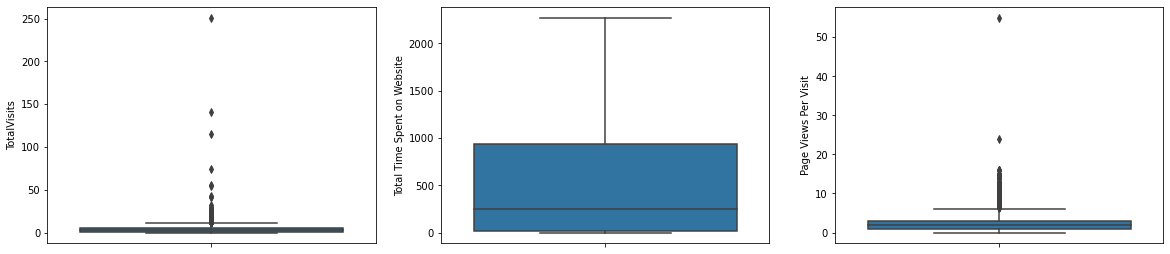

In [62]:
# Checking outliers in all the numeric columns

plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = leads)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.show()

In [63]:
leads['Page Views Per Visit'].quantile(0.99)

9.0

In [64]:
leads['TotalVisits'].quantile(0.99)

17.0

In [65]:
# Capping 'Page Views Per Visit' column values to 0.99 quantile to remove outliers
leads = leads[leads['Page Views Per Visit'] <= leads['Page Views Per Visit'].quantile(0.99)]

In [66]:
# Capping 'TotalVisits' column values to 0.99 quantile to remove outliers
leads = leads[leads['TotalVisits'] <= leads['TotalVisits'].quantile(0.99)]

In [67]:
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.384946,3.116487,484.125083,2.259975
std,0.486609,2.824993,547.404471,1.880083
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,8.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,4.000000,930.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,9.000000,1558.350000,6.000000
99%,1.000000,13.000000,1840.270000,8.000000


In [68]:
leads.shape

(9074, 11)

In [69]:
# Checking the percentage of rows retained

rows_retained = round(100*(len(leads)/9240),2)
print(rows_retained)

98.2


## 3. Exploratory Data Analysis

In [70]:
#Importing libraries required for visualization
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px

In [71]:
temp = leads.Converted.value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})

df.iplot(kind='pie',labels='labels',values='values', title='Converted variable Imbalance Distribution', hole = 0.4)

#### We can observe from above piechart that the conversion rate is 38.5% .

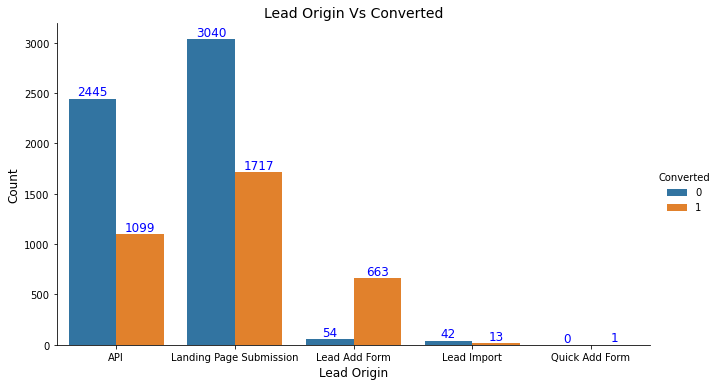

In [72]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leads, aspect= 1.8);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission 

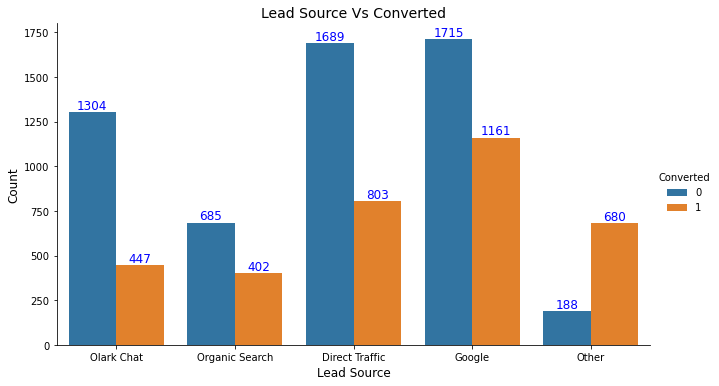

In [73]:
# Lead Origin

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leads, aspect= 1.8);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### From above plot we can see that maximum conversions are there when lead is obtained from Google.

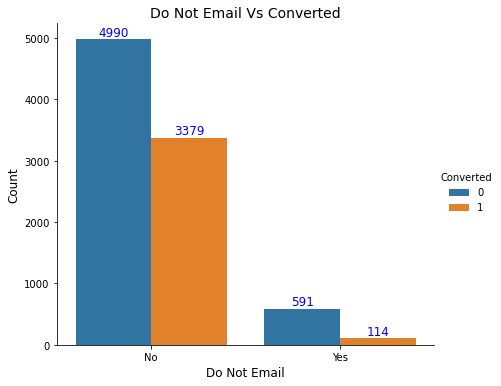

In [74]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leads, aspect = 1.2);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Majority of customers opted to be contacted through emails and the conversion rate is also higher for these customers. <br> Also, conversion rate is very for customers opting to not receive email from the company.


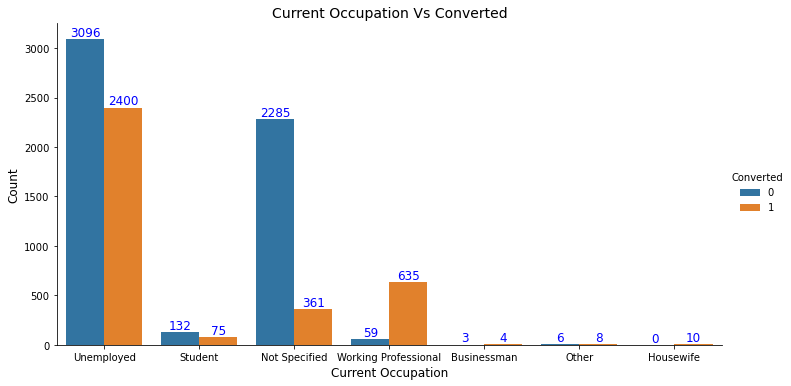

In [75]:
# Occupation (Feature dervied from original column: What is your current occupation)

plot = sns.catplot(x="Occupation", hue = "Converted", kind="count", data=leads, aspect = 2);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Maximum customers that converted are unemployed. We can also observe that working professionals are more likely to convert where customers who chose not to share their occupation are less likely to be converted

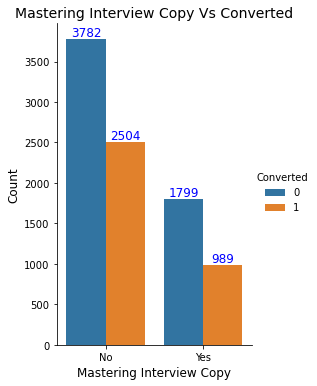

In [76]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leads, aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Customers who do not want a free copy of Mastering the Interview have higher conversion rate.

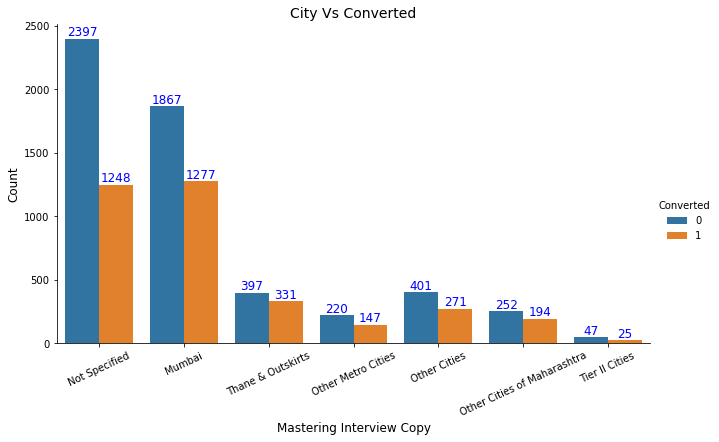

In [77]:
# City

plot = sns.catplot(x="City", hue = "Converted", kind="count", data=leads, aspect = 1.8);

plt.title('City Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.xticks(rotation=25)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### The graph shows that maximum number of leads are from Mumbai whereas conversion rate is higher for Thane Outskirts.

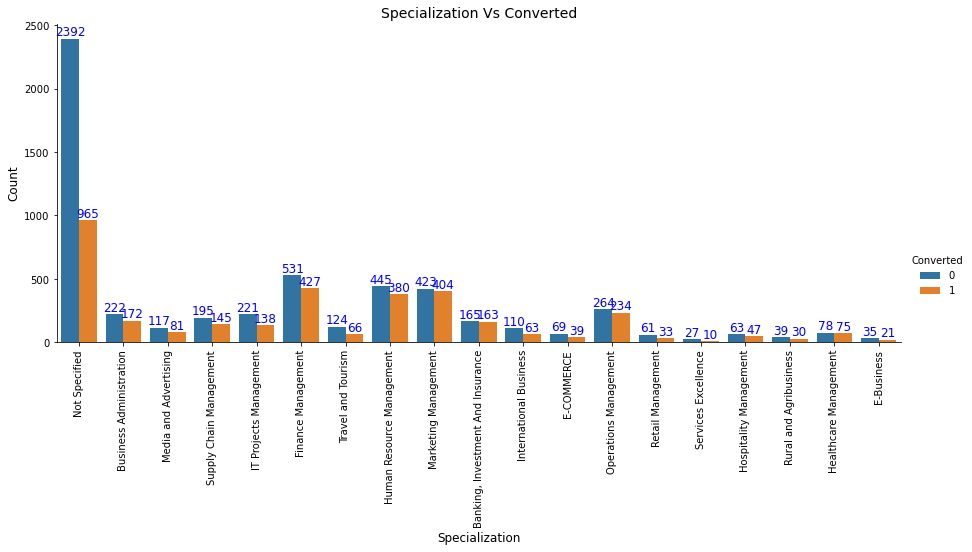

In [78]:
# Specialization

plot = sns.catplot(x="Specialization", hue = "Converted", kind="count", data=leads, aspect = 2.5);

plt.title('Specialization Vs Converted', fontsize = 14)
plt.xlabel("Specialization", fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Though majority leads are the customers who have not specified their Specialization, the conversion rate is very low.
#### We can also see that lead conversion rate is higher for Management specializations (Finance, marketing, operations) as well as Banking & Insurance. 

## 4. Data Preparation

In [79]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Specialization                          9074 non-null   object 
 8   City                                    9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Occupation                              9074 non-null   obje

In [80]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,A free copy of Mastering The Interview,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Not Specified,Not Specified,No,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Not Specified,Not Specified,No,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Mumbai,Yes,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Mumbai,No,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Specified,Mumbai,No,Unemployed


In [81]:
#List of variables to be converted to binary
var_list =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leads[var_list] = leads[var_list].apply(binary_map)

In [82]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,A free copy of Mastering The Interview,Occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Not Specified,Not Specified,0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Not Specified,Not Specified,0,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Mumbai,1,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Mumbai,0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Specified,Mumbai,0,Unemployed


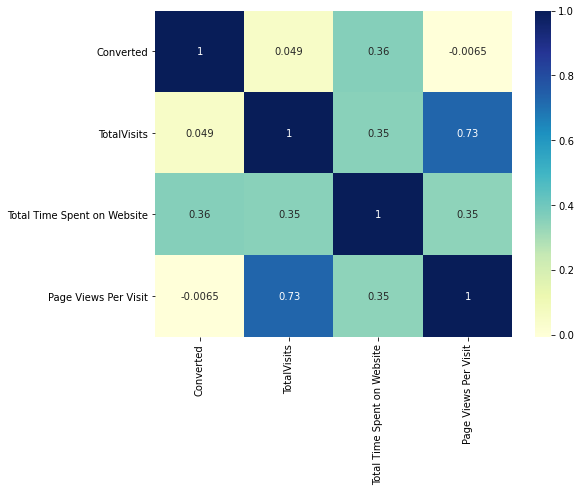

In [83]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(8,6))

# heatmap
sns.heatmap(leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), 
            cmap="YlGnBu", annot=True)
plt.show()

### 4.1 Dummy Variable Creation

In [84]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization', 'City', 'Occupation'], dtype='object')

In [85]:
leads.Occupation.value_counts()

Unemployed              5496
Not Specified           2646
Working Professional     694
Student                  207
Other                     14
Housewife                 10
Businessman                7
Name: Occupation, dtype: int64

In [86]:
# Getting dummies  
dummy = pd.get_dummies(leads['Occupation'], prefix  = 'Occupation')
# Dropping one column
dummy = dummy.drop(['Occupation_Not Specified'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis = 1)

In [87]:
leads['Lead Source'].value_counts()

Google            2876
Direct Traffic    2492
Olark Chat        1751
Organic Search    1087
Other              868
Name: Lead Source, dtype: int64

In [88]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Other'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [89]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4757
API                        3544
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [90]:
dummy = pd.get_dummies(leads['Lead Origin'], prefix  = 'Lead Origin')
dummy = dummy.drop(['Lead Origin_Quick Add Form'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [91]:
leads.Specialization.value_counts()

Not Specified                        3357
Finance Management                    958
Marketing Management                  827
Human Resource Management             825
Operations Management                 498
Business Administration               394
IT Projects Management                359
Supply Chain Management               340
Banking, Investment And Insurance     328
Media and Advertising                 198
Travel and Tourism                    190
International Business                173
Healthcare Management                 153
Hospitality Management                110
E-COMMERCE                            108
Retail Management                      94
Rural and Agribusiness                 69
E-Business                             56
Services Excellence                    37
Name: Specialization, dtype: int64

In [92]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [93]:
leads.City.value_counts()

Not Specified                  3645
Mumbai                         3144
Thane & Outskirts               728
Other Cities                    672
Other Cities of Maharashtra     446
Other Metro Cities              367
Tier II Cities                   72
Name: City, dtype: int64

In [94]:
dummy = pd.get_dummies(leads['City'], prefix  = 'City')
dummy = dummy.drop(['City_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [95]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [96]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [97]:
leads.shape

(9074, 44)

In [98]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9074 non-null   int64  
 1   Converted                                         9074 non-null   int64  
 2   TotalVisits                                       9074 non-null   float64
 3   Total Time Spent on Website                       9074 non-null   int64  
 4   Page Views Per Visit                              9074 non-null   float64
 5   A free copy of Mastering The Interview            9074 non-null   int64  
 6   Occupation_Businessman                            9074 non-null   uint8  
 7   Occupation_Housewife                              9074 non-null   uint8  
 8   Occupation_Other                                  9074 non-null   uint8  
 9   Occupation_Student 

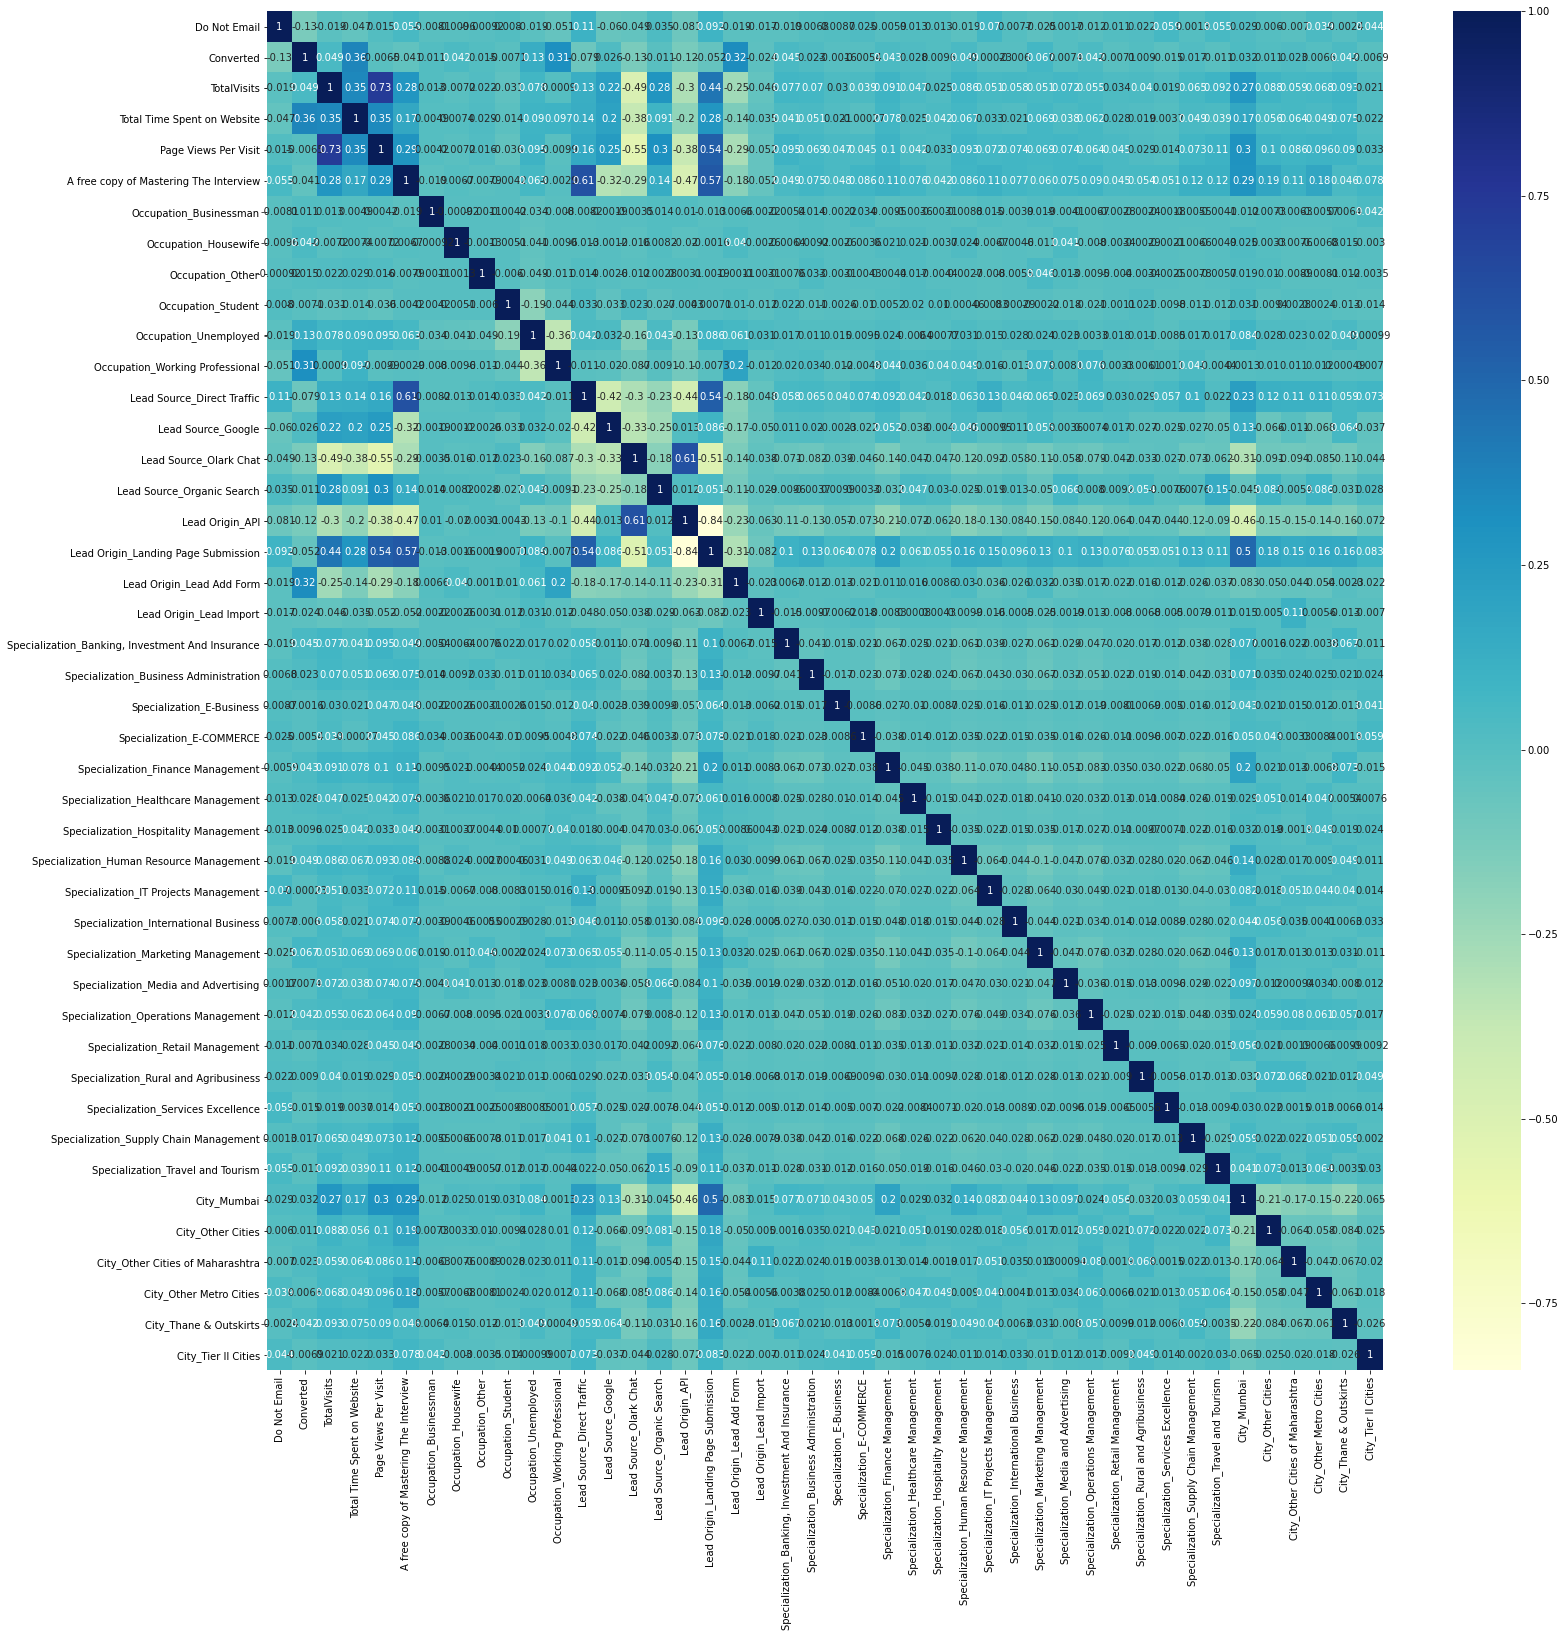

In [99]:
#Checking correlations of features in the dataset

plt.figure(figsize=(25,25))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()


## 5. Test-Train Split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
# Putting response variable to y
y = leads['Converted']

X=leads.drop('Converted', axis=1)

In [102]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [103]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [104]:
X.shape

(9074, 43)

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 2982 to 5738
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      6351 non-null   int64  
 1   TotalVisits                                       6351 non-null   float64
 2   Total Time Spent on Website                       6351 non-null   int64  
 3   Page Views Per Visit                              6351 non-null   float64
 4   A free copy of Mastering The Interview            6351 non-null   int64  
 5   Occupation_Businessman                            6351 non-null   uint8  
 6   Occupation_Housewife                              6351 non-null   uint8  
 7   Occupation_Other                                  6351 non-null   uint8  
 8   Occupation_Student                                6351 non-null   uint8  
 9   Occupation_Unemp

## 6. Rescaling the features with MinMax Scaling

In [107]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [108]:
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

In [109]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2982,0.0,0.3125,0.652020,0.555556,0.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0.0,0.0000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0.0,0.0000,0.000000,0.000000,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4722,1.0,0.5000,0.075455,0.444444,1.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7983,0.0,0.0000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 7. Model Building using Stats Model & RFE

### Feature Selection Using RFE

In [110]:
import statsmodels.api as sm

In [111]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [112]:

from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [113]:

rfe.support_

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False])

In [114]:

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 9),
 ('Occupation_Businessman', False, 6),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 11),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-Business', False, 8),
 ('Specialization_E-COMMERCE', False, 10),
 ('Specialization_Finance Management', False, 20),
 (

In [115]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities'],
      dtype='object')

In [116]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Occupation_Businessman', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Trave

### Model 1

In [117]:
#Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.9
Date:                Mon, 17 May 2021   Deviance:                       5625.8
Time:                        21:51:43   Pearson chi2:                 8.21e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  17.5781   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Do Not Email                           -1.3062      0.161     -8.111      0.000      -1.622      -0.991
TotalVisits                             1.0778      0.235      4.590      0.000       0.618       1.538
Total Time Spent on Website             4.5566      0.161     28.263      0.000       4.241       4.873
Occupation_Housewife                   23.6326   1.34e+04      0.002      0.999   -2.62e+04    2.62e+04
Occupation_Other                        1.7962      0.787      2.282      0.023       0.253       3.339
Occupation_Student                      1.1850      0.211      5.624      0.000       0.772       1.598
Occupation_Unemployed                   1.3536      0.084     16.107      0.000       1.189       1.518
Occupation_Working Professional         3.9183      0.194     20.148      0.000       3.537       4.300
Lead Source_Olark Chat                  1.1516      0.125      9.222      0.000       0.907       1.396
Lead Origin_API                       -20.8246   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission   -20.9773   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form             -16.7688   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Import               -21.2311   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
City_Other Cities of Maharashtra        0.2130      0.152      1.400      0.162      -0.085       0.511
City_Other Metro Cities                 0.2547      0.162      1.573      0.116      -0.063       0.572
=======================================================================================================
"""

#### Checking VIF

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Origin_Landing Page Submission,5.05
9,Lead Origin_API,4.39
1,TotalVisits,3.58
6,Occupation_Unemployed,3.27
8,Lead Source_Olark Chat,2.66
2,Total Time Spent on Website,2.28
11,Lead Origin_Lead Add Form,1.48
7,Occupation_Working Professional,1.40
0,Do Not Email,1.11
13,City_Other Cities of Maharashtra,1.10


Dropping column 'Lead Origin_Landing Page Submission' since it has high P value as well as VIF

In [119]:
col = col.drop('Lead Origin_Landing Page Submission',1)

### Model 2

In [120]:
# Model2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.1
Date:                Mon, 17 May 2021   Deviance:                       5626.2
Time:                        21:51:43   Pearson chi2:                 8.21e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.4002      0.121    -28.148      0.000      -3.637      -3.163
Do Not Email                        -1.3024      0.161     -8.104      0.000      -1.617      -0.987
TotalVisits                          1.0770      0.235      4.586      0.000       0.617       1.537
Total Time Spent on Website          4.5595      0.161     28.297      0.000       4.244       4.875
Occupation_Housewife                23.6334   1.34e+04      0.002      0.999   -2.62e+04    2.62e+04
Occupation_Other                     1.7960      0.787      2.281      0.023       0.253       3.339
Occupation_Student                   1.1850      0.211      5.623      0.000       0.772       1.598
Occupation_Unemployed                1.3539      0.084     16.111      0.000       1.189       1.519
Occupation_Working Professional      3.9184      0.194     20.149      0.000       3.537       4.300
Lead Source_Olark Chat               1.1523      0.125      9.228      0.000       0.908       1.397
Lead Origin_API                      0.1526      0.087      1.750      0.080      -0.018       0.324
Lead Origin_Lead Add Form            4.2086      0.198     21.258      0.000       3.821       4.597
Lead Origin_Lead Import             -0.2538      0.509     -0.499      0.618      -1.251       0.744
City_Other Cities of Maharashtra     0.2130      0.152      1.400      0.162      -0.085       0.511
City_Other Metro Cities              0.2586      0.162      1.600      0.110      -0.058       0.576
====================================================================================================
"""

#### Checking VIF

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Origin_API,2.53
6,Occupation_Unemployed,2.46
1,TotalVisits,2.38
8,Lead Source_Olark Chat,2.24
2,Total Time Spent on Website,2.10
7,Occupation_Working Professional,1.31
10,Lead Origin_Lead Add Form,1.29
12,City_Other Cities of Maharashtra,1.09
13,City_Other Metro Cities,1.07
0,Do Not Email,1.06


Dropping column 'Occupation_Housewife' since it has high P value.

In [122]:
col = col.drop('Occupation_Housewife',1)

### Model 3

In [123]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.4
Date:                Mon, 17 May 2021   Deviance:                       5644.9
Time:                        21:51:43   Pearson chi2:                 8.29e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.3670      0.120    -28.063      0.000      -3.602      -3.132
Do Not Email                        -1.3104      0.161     -8.151      0.000      -1.626      -0.995
TotalVisits                          1.0669      0.234      4.550      0.000       0.607       1.526
Total Time Spent on Website          4.5570      0.161     28.336      0.000       4.242       4.872
Occupation_Other                     1.7716      0.787      2.251      0.024       0.229       3.314
Occupation_Student                   1.1590      0.211      5.504      0.000       0.746       1.572
Occupation_Unemployed                1.3273      0.083     15.937      0.000       1.164       1.491
Occupation_Working Professional      3.8917      0.194     20.043      0.000       3.511       4.272
Lead Source_Olark Chat               1.1437      0.125      9.173      0.000       0.899       1.388
Lead Origin_API                      0.1462      0.087      1.680      0.093      -0.024       0.317
Lead Origin_Lead Add Form            4.2319      0.198     21.396      0.000       3.844       4.620
Lead Origin_Lead Import             -0.2598      0.509     -0.511      0.609      -1.257       0.737
City_Other Cities of Maharashtra     0.2063      0.152      1.357      0.175      -0.092       0.504
City_Other Metro Cities              0.2521      0.162      1.561      0.119      -0.064       0.569
====================================================================================================
"""

#### Checking VIF

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_API,2.53
5,Occupation_Unemployed,2.46
1,TotalVisits,2.38
7,Lead Source_Olark Chat,2.24
2,Total Time Spent on Website,2.10
6,Occupation_Working Professional,1.30
9,Lead Origin_Lead Add Form,1.28
11,City_Other Cities of Maharashtra,1.09
12,City_Other Metro Cities,1.07
0,Do Not Email,1.06


Dropping column 'Lead Origin_Lead Import' since it has high P value.

In [125]:
col = col.drop('Lead Origin_Lead Import',1)

### Model 4

In [126]:
# Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.6
Date:                Mon, 17 May 2021   Deviance:                       5645.1
Time:                        21:51:44   Pearson chi2:                 8.30e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.3724      0.120    -28.207      0.000      -3.607      -3.138
Do Not Email                        -1.3091      0.161     -8.142      0.000      -1.624      -0.994
TotalVisits                          1.0765      0.234      4.605      0.000       0.618       1.535
Total Time Spent on Website          4.5606      0.161     28.379      0.000       4.246       4.876
Occupation_Other                     1.7712      0.787      2.250      0.024       0.228       3.314
Occupation_Student                   1.1602      0.211      5.509      0.000       0.747       1.573
Occupation_Unemployed                1.3274      0.083     15.936      0.000       1.164       1.491
Occupation_Working Professional      3.8917      0.194     20.047      0.000       3.511       4.272
Lead Source_Olark Chat               1.1468      0.125      9.207      0.000       0.903       1.391
Lead Origin_API                      0.1482      0.087      1.705      0.088      -0.022       0.319
Lead Origin_Lead Add Form            4.2370      0.198     21.447      0.000       3.850       4.624
City_Other Cities of Maharashtra     0.1995      0.151      1.318      0.188      -0.097       0.496
City_Other Metro Cities              0.2512      0.162      1.555      0.120      -0.065       0.568
====================================================================================================
"""

#### Checking VIF

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_API,2.53
5,Occupation_Unemployed,2.44
1,TotalVisits,2.38
7,Lead Source_Olark Chat,2.24
2,Total Time Spent on Website,2.10
6,Occupation_Working Professional,1.30
9,Lead Origin_Lead Add Form,1.28
10,City_Other Cities of Maharashtra,1.07
11,City_Other Metro Cities,1.07
0,Do Not Email,1.06


Dropping column 'City_Other Cities of Maharashtra' since it has high P value.

In [128]:
col = col.drop('City_Other Cities of Maharashtra',1)

### Model 5

In [129]:
# Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2823.4
Date:                Mon, 17 May 2021   Deviance:                       5646.9
Time:                        21:51:44   Pearson chi2:                 8.30e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.3548      0.119    -28.258      0.000      -3.588      -3.122
Do Not Email                       -1.3136      0.161     -8.170      0.000      -1.629      -0.998
TotalVisits                         1.0704      0.234      4.579      0.000       0.612       1.529
Total Time Spent on Website         4.5640      0.161     28.406      0.000       4.249       4.879
Occupation_Other                    1.7607      0.787      2.237      0.025       0.218       3.303
Occupation_Student                  1.1580      0.211      5.495      0.000       0.745       1.571
Occupation_Unemployed               1.3295      0.083     15.964      0.000       1.166       1.493
Occupation_Working Professional     3.8933      0.194     20.056      0.000       3.513       4.274
Lead Source_Olark Chat              1.1451      0.125      9.196      0.000       0.901       1.389
Lead Origin_API                     0.1329      0.086      1.543      0.123      -0.036       0.302
Lead Origin_Lead Add Form           4.2213      0.197     21.412      0.000       3.835       4.608
City_Other Metro Cities             0.2344      0.161      1.456      0.145      -0.081       0.550
===================================================================================================
"""

#### Checking VIF

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_API,2.51
5,Occupation_Unemployed,2.42
1,TotalVisits,2.37
7,Lead Source_Olark Chat,2.24
2,Total Time Spent on Website,2.09
6,Occupation_Working Professional,1.30
9,Lead Origin_Lead Add Form,1.28
0,Do Not Email,1.06
10,City_Other Metro Cities,1.06
4,Occupation_Student,1.05


Dropping column 'City_Other Metro Cities' since it has high P value.

In [131]:
col = col.drop('City_Other Metro Cities',1)

### Model 6

In [132]:
# Model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.5
Date:                Mon, 17 May 2021   Deviance:                       5649.0
Time:                        21:51:44   Pearson chi2:                 8.30e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.3391      0.118    -28.272      0.000      -3.571      -3.108
Do Not Email                       -1.3050      0.160     -8.135      0.000      -1.619      -0.991
TotalVisits                         1.0750      0.234      4.598      0.000       0.617       1.533
Total Time Spent on Website         4.5637      0.161     28.406      0.000       4.249       4.879
Occupation_Other                    1.7476      0.787      2.221      0.026       0.205       3.290
Occupation_Student                  1.1615      0.211      5.511      0.000       0.748       1.575
Occupation_Unemployed               1.3296      0.083     15.974      0.000       1.166       1.493
Occupation_Working Professional     3.8984      0.194     20.084      0.000       3.518       4.279
Lead Source_Olark Chat              1.1454      0.124      9.200      0.000       0.901       1.389
Lead Origin_API                     0.1181      0.085      1.382      0.167      -0.049       0.286
Lead Origin_Lead Add Form           4.2039      0.197     21.374      0.000       3.818       4.589
===================================================================================================
"""

#### Checking VIF

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_API,2.49
5,Occupation_Unemployed,2.41
1,TotalVisits,2.36
7,Lead Source_Olark Chat,2.23
2,Total Time Spent on Website,2.09
6,Occupation_Working Professional,1.30
9,Lead Origin_Lead Add Form,1.27
0,Do Not Email,1.06
4,Occupation_Student,1.05
3,Occupation_Other,1.01


Dropping column 'Lead Origin_API' since it has high P value.

In [134]:
col = col.drop('Lead Origin_API',1)

### Model 7

In [135]:
# Model 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.4
Date:                Mon, 17 May 2021   Deviance:                       5650.9
Time:                        21:51:44   Pearson chi2:                 8.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.2950      0.113    -29.048      0.000      -3.517      -3.073
Do Not Email                       -1.3141      0.160     -8.203      0.000      -1.628      -1.000
TotalVisits                         1.0453      0.233      4.489      0.000       0.589       1.502
Total Time Spent on Website         4.5655      0.161     28.419      0.000       4.251       4.880
Occupation_Other                    1.7448      0.784      2.225      0.026       0.208       3.282
Occupation_Student                  1.1531      0.211      5.475      0.000       0.740       1.566
Occupation_Unemployed               1.3252      0.083     15.935      0.000       1.162       1.488
Occupation_Working Professional     3.8881      0.194     20.048      0.000       3.508       4.268
Lead Source_Olark Chat              1.2233      0.111     10.979      0.000       1.005       1.442
Lead Origin_Lead Add Form           4.1659      0.195     21.399      0.000       3.784       4.547
===================================================================================================
"""

#### Checking VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Occupation_Unemployed,2.35
1,TotalVisits,2.32
2,Total Time Spent on Website,2.06
6,Occupation_Working Professional,1.29
8,Lead Origin_Lead Add Form,1.26
7,Lead Source_Olark Chat,1.15
0,Do Not Email,1.06
4,Occupation_Student,1.05
3,Occupation_Other,1.01


#### All variables have low p values and VIF within acceptable range. So we need not drop any more variables and we can proceed with making predictions using this model.

In [137]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


2982    0.791459
996     0.111882
9226    0.321598
4722    0.081914
7983    0.111882
1255    0.321598
2856    0.773502
4938    0.043047
7523    0.321598
1224    0.089871
dtype: float64

In [138]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.79145872, 0.111882  , 0.32159789, 0.08191409, 0.111882  ,
       0.32159789, 0.77350223, 0.04304691, 0.32159789, 0.0898706 ])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [139]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id
0,1,0.791459,2982
1,0,0.111882,996
2,0,0.321598,9226
3,0,0.081914,4722
4,0,0.111882,7983


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [140]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted
0,1,0.791459,2982,1
1,0,0.111882,996,0
2,0,0.321598,9226,0
3,0,0.081914,4722,0
4,0,0.111882,7983,0


### Lets check the confusion metrics and accuracy

In [141]:
from sklearn import metrics

In [142]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3460  419]
 [ 838 1634]]


In [143]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8020784128483703


Accuracy rate is around 80% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

#### Metrics - Sensitivity, Specificity

In [144]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6610032362459547

In [146]:
# Let us calculate specificity

TN / float(TN+FP)

0.8919824697086878

### 8. Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [147]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [148]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

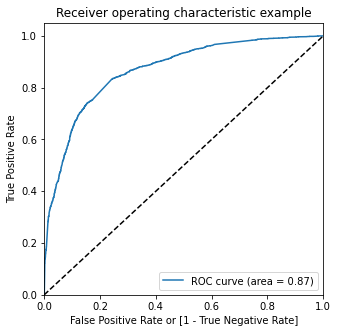

In [149]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### 9. Finding Optimal Cutoff Point

Optimal cut offm probability is that prob where we get balanced sensitivity and specificity

In [150]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.791459,2982,1,1,1,1,1,1,1,1,1,0,0
1,0,0.111882,996,0,1,1,0,0,0,0,0,0,0,0
2,0,0.321598,9226,0,1,1,1,1,0,0,0,0,0,0
3,0,0.081914,4722,0,1,0,0,0,0,0,0,0,0,0
4,0,0.111882,7983,0,1,1,0,0,0,0,0,0,0,0


In [151]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389230  1.000000  0.000000
0.1   0.1  0.530468  0.984628  0.241042
0.2   0.2  0.700835  0.907362  0.569219
0.3   0.3  0.780350  0.840210  0.742202
0.4   0.4  0.805542  0.716828  0.862078
0.5   0.5  0.802078  0.661003  0.891982
0.6   0.6  0.786175  0.586974  0.913122
0.7   0.7  0.766808  0.499191  0.937355
0.8   0.8  0.737049  0.379854  0.964682
0.9   0.9  0.678003  0.185275  0.992008


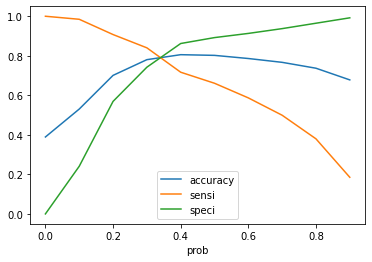

In [152]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.31 is the optimum point to take it as a cutoff probability.

In [153]:
cutoff = 0.31

In [154]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > cutoff else 0)
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.791459,2982,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.111882,996,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.321598,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.081914,4722,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.111882,7983,0,1,1,0,0,0,0,0,0,0,0,0
5,0,0.321598,1255,0,1,1,1,1,0,0,0,0,0,0,1
6,1,0.773502,2856,1,1,1,1,1,1,1,1,1,0,0,1
7,0,0.043047,4938,0,1,0,0,0,0,0,0,0,0,0,0
8,1,0.321598,7523,0,1,1,1,1,0,0,0,0,0,0,1
9,0,0.089871,1224,0,1,0,0,0,0,0,0,0,0,0,0


In [155]:

# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.791459,2982,1,1,1,1,1,1,1,1,1,0,0,1,79
1,0,0.111882,996,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.321598,9226,0,1,1,1,1,0,0,0,0,0,0,1,32
3,0,0.081914,4722,0,1,0,0,0,0,0,0,0,0,0,0,8
4,0,0.111882,7983,0,1,1,0,0,0,0,0,0,0,0,0,11
5,0,0.321598,1255,0,1,1,1,1,0,0,0,0,0,0,1,32
6,1,0.773502,2856,1,1,1,1,1,1,1,1,1,0,0,1,77
7,0,0.043047,4938,0,1,0,0,0,0,0,0,0,0,0,0,4
8,1,0.321598,7523,0,1,1,1,1,0,0,0,0,0,0,1,32
9,0,0.089871,1224,0,1,0,0,0,0,0,0,0,0,0,0,9


In [156]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_train_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_train_df['final_predicted'].value_counts()

1    2067
0     405
Name: final_predicted, dtype: int64

In [157]:
# check the precentage of final_predicted conversions (i.e True positive rate)

2067/float(2067+405)

0.8361650485436893

#### We know that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement and our current model achieves 83%. Hence this is a good model.¶

### Checking other Metrics (Accuracy, Sensitivity, Specificity, Precision, Recall) on training data

### Accuracy (training)

In [158]:

# Let's check the overall accuracy.

accu_train = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
accu_train

0.7847583057786175

In [159]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2917,  962],
       [ 405, 2067]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity (training)

In [161]:
# Let's see the sensitivity of our logistic regression model

sensi_train = TP / float(TP+FN)
sensi_train

0.8361650485436893

### Specificity (training)

In [162]:
# Let us calculate specificity

speci_train = TN / float(TN+FP)
speci_train

0.7519979376127868

### Metrics - Precision and Recall

In [163]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2917,  962],
       [ 405, 2067]], dtype=int64)

In [164]:
from sklearn.metrics import precision_score, recall_score

### Precision (training)

In [165]:
# precision

prec_train = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
prec_train

0.6824034334763949

### Recall (training)

In [166]:
# recall

recall_train = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall_train

0.8361650485436893

### Precision and recall tradeoff

In [167]:
from sklearn.metrics import precision_recall_curve

In [168]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    1
 6348    0
 6349    1
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [169]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

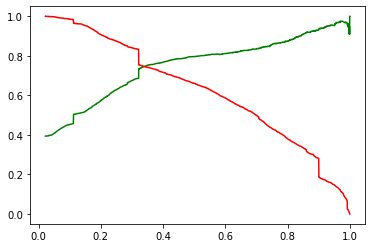

In [170]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 10. Making predictions on the test set

In [171]:
num_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

In [172]:
# Applying scaling on test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3241,0.0,0.2500,0.431869,0.147778,1.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1467,0.0,0.2500,0.396804,0.444444,0.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7932,0.0,0.0000,0.000000,0.000000,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4187,0.0,0.2500,0.339547,0.444444,0.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3800,0.0,0.1875,0.508655,0.333333,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [173]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Source_Olark Chat,Lead Origin_Lead Add Form
3241,0.0,0.2500,0.431869,0,0,1,0,0,0
1467,0.0,0.2500,0.396804,0,0,0,1,0,0
7932,0.0,0.0000,0.000000,0,0,1,0,1,0
4187,0.0,0.2500,0.339547,0,0,0,1,0,0
3800,0.0,0.1875,0.508655,0,0,0,0,0,0


In [174]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [175]:
y_test_pred = res.predict(X_test_sm)

In [176]:
y_test_pred[:10]

3241    0.565449
1467    0.934999
7932    0.321598
4187    0.917187
3800    0.315036
1776    0.098280
6490    0.137105
4792    0.096861
4194    0.899908
4685    0.093235
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head

y_pred_1.head()

,0
3241,0.565449
1467,0.934999
7932,0.321598
4187,0.917187
3800,0.315036


In [179]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting Lead_Id to index

y_test_df['Lead_Id'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

,Converted,Lead_Id,0
0,1,3241,0.565449
1,1,1467,0.934999
2,0,7932,0.321598
3,1,4187,0.917187
4,1,3800,0.315036


In [184]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [185]:
# Rearranging the columns

y_pred_final = y_pred_final[['Lead_Id','Converted','Converted_Prob']]

In [186]:
y_pred_final.head()

,Lead_Id,Converted,Converted_Prob
0,3241,1,0.565449
1,1467,1,0.934999
2,7932,0,0.321598
3,4187,1,0.917187
4,3800,1,0.315036


In [187]:

# Based on cut off threshold using accuracy, sensitivity and specificity of 0.31%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > cutoff else 0)

In [188]:
y_pred_final.head()

,Lead_Id,Converted,Converted_Prob,final_predicted
0,3241,1,0.565449,1
1,1467,1,0.934999,1
2,7932,0,0.321598,1
3,4187,1,0.917187,1
4,3800,1,0.315036,1


In [189]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Lead_Id,Converted,Converted_Prob,final_predicted,lead_score
0,3241,1,0.565449,1,57
1,1467,1,0.934999,1,93
2,7932,0,0.321598,1,32
3,4187,1,0.917187,1,92
4,3800,1,0.315036,1,32
5,1776,0,0.098280,0,10
6,6490,0,0.137105,0,14
7,4792,0,0.096861,0,10
8,4194,1,0.899908,1,90
9,4685,0,0.093235,0,9


In [190]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    837
0    184
Name: final_predicted, dtype: int64

In [191]:
# check the precentage of final_predicted conversions on test data (i.e. True positive rate)

837/float(837+184)

0.8197845249755142

### Hence we can see that the final prediction of conversions have a target rate of 82%.

### Checking other Metrics (Accuracy, Sensitivity, Specificity, Precision, Recall) on test data

### Accuracy (test)

In [192]:
# Let's check the accuracy.

accu_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accu_test

0.7653323540213001

In [193]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1247,  455],
       [ 184,  837]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity (test)

In [195]:
# Let's see the sensitivity of our logistic regression model
sensi_test = TP / float(TP+FN)
sensi_test

0.8197845249755142

### Specificity (test)

In [196]:
# Let us calculate specificity
speci_test = TN / float(TN+FP)
speci_test

0.7326674500587544

Precision and Recall metrics for the test set

### Precision (test)

In [197]:
# precision
prec_test = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
prec_test

0.6478328173374613

### Recall (test)

In [198]:
# recall
recall_test = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
recall_test

0.8197845249755142

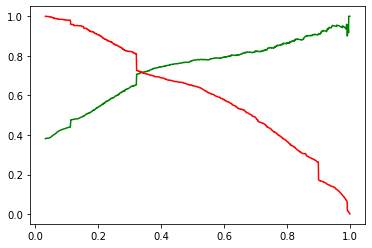

In [199]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Overall Metrics

### Train metrics

Below are the metrics obtained from the model on train data.

In [200]:
print('Accuracy   : ', round(accu_train*100),'%' )
print('Sensitivity: ', round(sensi_train*100),'%' )
print('Specificity: ', round(speci_train*100),'%')

Accuracy   :  78 %
Sensitivity:  84 %
Specificity:  75 %


### Test metrics

Below are the metrics obtained on test data.

In [201]:
print('Accuracy   : ', round(accu_test*100),'%')
print('Sensitivity: ', round(sensi_test*100),'%')
print('Specificity: ', round(speci_test*100),'%')

Accuracy   :  77 %
Sensitivity:  82 %
Specificity:  73 %


# Inferences from the model

- The Sensitivity, Accuracy and Specificity of the model is 82%, 77 and 73% respectively.
- For this model we have considered higher sensitivity value to achieve better lead converion rates. Due to higher sensitivity chances of missing the Hot leads is lower.
- The model achieves the target of 80% by predicting 82% of Hot leads. Hence this is a good model for Education X company to improve their conversion rate.

As per our regression model, below are the features that influence the conversion rate
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- Occupation_Working Professional
- Occupation_Other
- Occupation_Unemployed
- Lead Source_Olark Chat
- Occupation_Student
- TotalVisits
- Do Not Email

All the features except 'Do Not Email' improve the chances of lead conversion whereas 'Do Not Email' reduces it. It can be inferred from the negative coefficient value for the variable.